In [41]:
%matplotlib inline

import pandas

import pgdata

db = pgdata.connect()

# get salmon records that aren't in waterbodies
sql = """SELECT 
           fish_obsrvtn_distinct_id,
           edge_description, 
           waterbody_type,
           vertex_from_elevation,
           vertex_to_elevation,
           vertex_length,
           vertex_slope,
           segment_from_elevation,
           segment_to_elevation,
           segment_length,
           segment_slope,
           species_code,
           species_name
         FROM temp.obs_spp_by_slope 
         WHERE waterbody_type NOT IN ('X', 'L', 'W')
         AND species_code IN ('CH', 'CM', 'CO', 'PK', 'SK')
         ORDER BY fish_obsrvtn_distinct_id, species_code
"""
df = pandas.read_sql_query(sql, db.engine)

In [42]:
df.head()

,fish_obsrvtn_distinct_id,edge_description,waterbody_type,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,species_code,species_name
0,5,"Construction line, double line river, main flow",R,228.7,228.74,67.44,0.06,227.763,229.251,905.92,0.16,CH,Chinook Salmon
1,5,"Construction line, double line river, main flow",R,228.7,228.74,67.44,0.06,227.763,229.251,905.92,0.16,CO,Coho Salmon
2,5,"Construction line, double line river, main flow",R,228.7,228.74,67.44,0.06,227.763,229.251,905.92,0.16,SK,Sockeye Salmon
3,6,"Construction line, connection",R,122.0,122.00,853.06,0.00,122.000,122.000,867.69,0.00,CO,Coho Salmon
4,6,"Construction line, connection",R,122.0,122.00,853.06,0.00,122.000,122.000,867.69,0.00,CO,Coho Salmon


In [43]:
df.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,14010.000000,14010.000000,14010.000000,14010.000000,14010.000000,14010.000000,14010.000000,14010.000000,14010.000000
mean,25913.274946,190.239521,191.218847,121.150269,1.693593,188.666837,196.474611,754.593880,0.972302
std,15970.127227,252.367165,252.171830,145.396737,11.353263,252.413160,251.103213,730.516249,1.821784
min,5.000000,1.000000,1.000000,0.220000,0.000000,1.000000,1.000000,6.770000,0.000000
25%,13374.500000,12.810000,13.310000,47.350000,0.000000,11.709750,14.636000,251.190000,0.050000
50%,24818.000000,72.060000,73.065000,76.780000,0.350000,70.268000,90.000000,498.560000,0.450000
75%,36743.000000,256.500000,259.000000,147.750000,1.600000,254.497000,261.750000,1072.760000,1.050000
max,63552.000000,1318.150000,1318.540000,2398.250000,724.160000,1318.000000,1320.000000,8153.200000,37.550000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110050208>]],
      dtype=object)

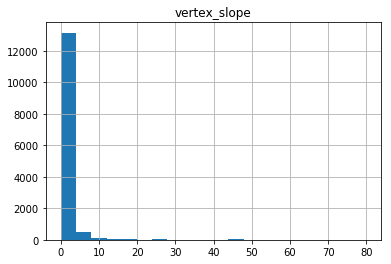

In [20]:
# histogram of slopes between vertexes where slope < 100%

df[df['vertex_slope'] < 100].hist(column='vertex_slope', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11265d400>]],
      dtype=object)

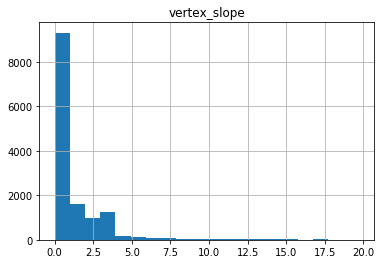

In [24]:
# histogram of slopes between vertexes where slope < 20%
df[df['vertex_slope'] < 20].hist(column='vertex_slope', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11565df60>]],
      dtype=object)

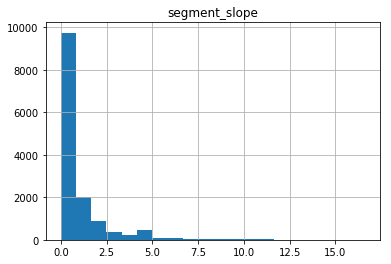

In [26]:
# histogram of segment slopes where slope < 20%
df[df['segment_slope'] < 20].hist(column='segment_slope', bins=20)

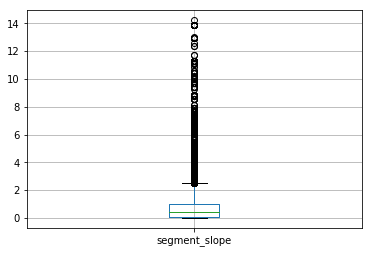

In [27]:
# try a box plot for all salmon, segment slopes less than 15%

df[df['segment_slope'] < 15].boxplot(column=['segment_slope'])

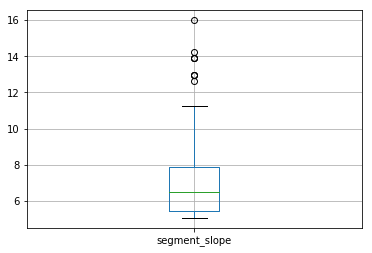

In [55]:
# try coho at 5-15%
df_sp = df[df['species_code'] == 'CH']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

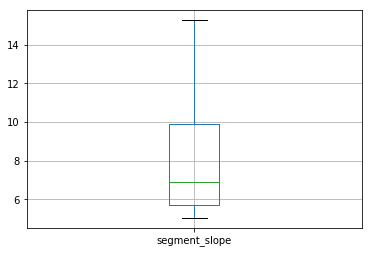

In [56]:
df_sp = df[df['species_code'] == 'CM']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

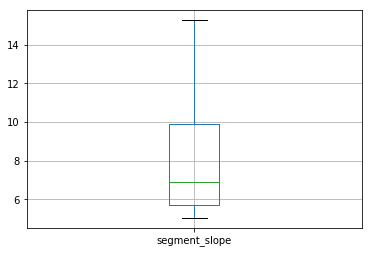

In [53]:
# CM
df_sp = df[df['species_code'] == 'CM']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

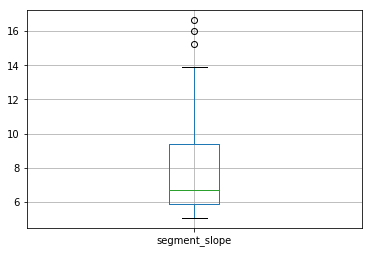

In [57]:
df_sp = df[df['species_code'] == 'CO']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

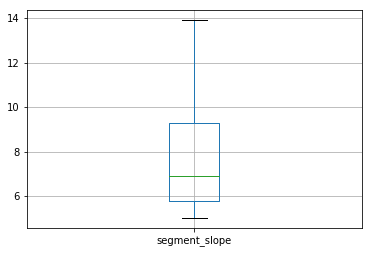

In [58]:
df_sp = df[df['species_code'] == 'PK']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

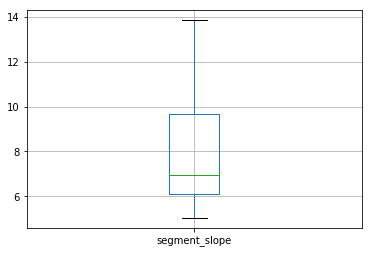

In [59]:
df_sp = df[df['species_code'] == 'SK']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])